Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics  import precision_score, recall_score

Data Loading/Feature Engineering/Visualization

In [5]:
tumor_df = load_breast_cancer()
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
df = pd.DataFrame(tumor_df.data, columns=tumor_df[features])
df['target'] = tumor_df.target
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [3]:
#sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In [4]:
# plt.figure(figsize=(20,12))
# sns.heatmap(df.corr(), annot=True)

Training and Testing

In [5]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

Building Basic SVM

In [25]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled,y_train)

SVC()

In [7]:
confusion_matrix(y_test, clf_svm.predict(X_test_scaled))

array([[ 73,   1],
       [  4, 150]])

In [17]:
accuracy = clf_svm.score(X_test_scaled, y_test)
y_pred = clf_svm.predict(X_test_scaled)
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred, labels=['Malignant', 'Benign']).round(2))
print("Recall: ", recall_score(y_test, y_pred, labels=['Malignant', 'Benign']).round(2)) 

Accuracy:  0.98
Precision:  0.99
Recall:  0.97


Optimizing Parameters with Cross Validation and GridSearchCV

In [18]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
    ]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
c = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Building SVM with Optimal Params

In [26]:
clf_svm = SVC(C=10, gamma=1, kernel='rbf')
clf_svm.fit(X_train_scaled,y_train)

SVC(C=10, gamma=1)

In [27]:
confusion_matrix(y_test, clf_svm.predict(X_test_scaled))

array([[  2,  72],
       [  0, 154]])

In [28]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred, labels=['Malignant', 'Benign']).round(2))
print("Recall: ", recall_score(y_test, y_pred, labels=['Malignant', 'Benign']).round(2)) 

Accuracy:  0.98
Precision:  0.99
Recall:  0.97


Reducing Dimensionality with PCA

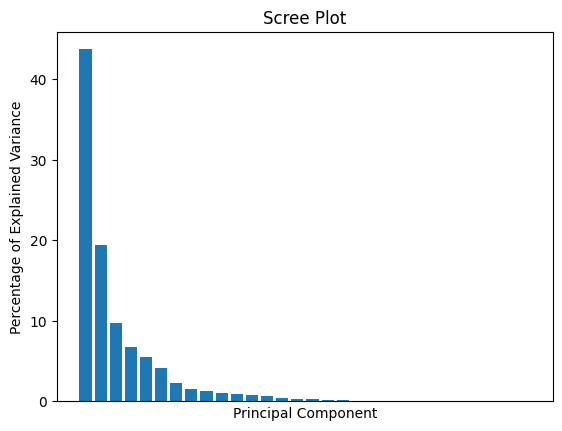

In [21]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [22]:
from sklearn.decomposition import PCA
pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = [
    {'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_pca, y_train)
c = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [24]:
clf_svm_pca = SVC(C=100, gamma='scale', kernel='rbf')
clf_svm_pca.fit(X_train_pca, y_train)
train_score = clf_svm_pca.score(X_train_pca, y_train)
train_score
# print("Accuracy: ", accuracy.round(2))
# print("Precision: ", precision_score(y_test, y_pred, labels=['Malignant', 'Benign']).round(2))
# print("Recall: ", recall_score(y_test, y_pred, labels=['Malignant', 'Benign']).round(2)) 

Accuracy:  0.98
Precision:  0.99
Recall:  0.97


In [20]:
# train_pc1_coords = X_train_pca[:, 0]
# train_pc2_coords = X_train_pca[:, 1]

# pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))
# x_test_pca = pca.transform(X_train_scaled)

# param_grid = [
#     {'C': [0.5, 1, 10, 100],
#         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
#         'kernel': ['rbf']}
# ]

# optimal_params = GridSearchCV(
#     SVC(),
#     param_grid,
#     cv=5,
#     scoring='accuracy',
#     verbose=0
# )

# optimal_params.fit(pca_train_scaled, y_train)
# c = optimal_params.best_params_['C']
# gamma = optimal_params.best_params_['gamma']
# kernel = optimal_params.best_params_['kernel']

# print(optimal_params.best_params_)

In [19]:
# from sklearn import metrics

# clf_svm = SVC(C=100, gamma=0.001, kernel='rbf')
# clf_svm.fit(pca_train_scaled, y_train)
# #confusion_matrix(y_test, clf_svm.predict(x_test_pca))
# y_pred = clf_svm.predict(x_test_pca)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Drawing SVM Graph

In [ ]:
# clf_svm = SVC(C=0.5, gamma=0.0001)
# clf_svm.fit(pca_train_scaled, y_train)

# x_test_pca = pca.transform(X_train_scaled)
# test_pc1_coords = x_test_pca[:, 0]
# test_pc2_coords = x_test_pca[:, 1]

# x_min = test_pc1_coords.min() - 1
# x_max = test_pc1_coords.max() + 1

# y_min = test_pc2_coords.min() - 1
# y_max = test_pc2_coords.max() + 1

# xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
#                      np.arange(start=y_min, stop=y_max, step=0.1))

# Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

# Z = Z.reshape(xx.shape)
# fig, ax = plt.subplots(figsize=(10,10))
# ax.contourf(xx, yy, Z, alpha=0.1)
# cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

# legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
# legend.get_texts()[0].set_text('Benign')
# legend.get_texts()[1].set_text('Malignant')


# ax.set_ylabel('PC2')
# ax.set_xlabel('PC1')   
# ax.set_title('Decision surface using the PCA transformed/projected features')
# plt.show()